In [1]:
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import joblib
from utils.metrics import rel_err, rank_corr, mse_K
from nphc3.optim import gradient_f, gradient_f_ijk
from numba import autojit

In [11]:
from nphc.utils.loader import load_data
# Load Cumulants object
kernel = 'exp_d100'
mode = 'nonsym'
log10T = 9
url = 'https://s3-eu-west-1.amazonaws.com/nphc-data/{}_{}_log10T{}_with_Beta_without_N.pkl.gz'.format(kernel, mode, log10T)
cumul, Beta = load_data(url)

In [12]:
import gzip, pickle
f = gzip.open('out.pkl.gz','rb')
R = pickle.load(f)
f.close()

d = R.shape[0]

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


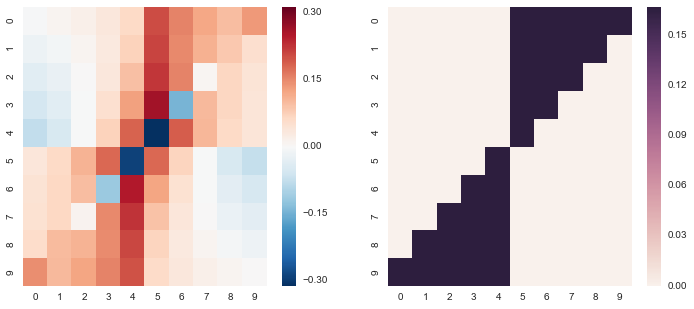

In [13]:
fig, axs = plt.subplots(figsize=(12,5), nrows=1, ncols=2)

from scipy.linalg import inv
G = np.eye(d) - inv(R)
sns.heatmap(G[::-1], ax=axs[0])
G_true = np.eye(d) - inv(cumul.R_true)
sns.heatmap(G_true[::-1], ax=axs[1])